<a href="https://colab.research.google.com/github/livingMabhijit/novel_text_classification/blob/main/noveltext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, LSTM, Embedding
from keras.models import Sequential


In [4]:
text_df = pd.read_fwf('/content/drive/MyDrive/Tensorflow_datasets_ryan/xtrain_obfuscated.txt',header=None,names=['Text'])

In [5]:
text_df

,Text
0,satwamuluhqgulamlrmvezuhqvkrpmletwulcitwskuhle...
1,twmkiwpmqvtwleuhsaiwsktwmvlelekramuhqvkruhtwsk...
2,vidfpmskuhvilepmuluhtwtvuhulsovienamqvuhskiwmv...
3,raskleenkrlruhtwulenleengztwqvuhenuhsatvuhsktw...
4,dfenqvuhtwamqvuhqgtwiwtvenuluhqvijletwamulenxe...
...,...
32508,gzpmamqvmvdfuhtwamuluhvitwamdfuhvipmonmvlepmam...
32509,qvkrpmmvyppmletwxeuhiwenletwmktwqvuhvidfpmskuh...
32510,qvmvamuhleentwtvuhpmuluhskvienuhqgtwxemviwuhqv...
32511,ralrvimvamypenpmlegzgzenuhqvendfuhgztwulqvuhtw...


In [6]:
novel_df = pd.read_fwf('/content/drive/MyDrive/Tensorflow_datasets_ryan/ytrain.txt',header=None,names=['Novel'])
novel_df


,Novel
0,7
1,3
2,8
3,3
4,4
...,...
32508,6
32509,10
32510,10
32511,6


In [7]:
df= pd.concat([text_df, novel_df], axis=1)
df.head()

,Text,Novel
0,satwamuluhqgulamlrmvezuhqvkrpmletwulcitwskuhle...,7
1,twmkiwpmqvtwleuhsaiwsktwmvlelekramuhqvkruhtwsk...,3
2,vidfpmskuhvilepmuluhtwtvuhulsovienamqvuhskiwmv...,8
3,raskleenkrlruhtwulenleengztwqvuhenuhsatvuhsktw...,3
4,dfenqvuhtwamqvuhqgtwiwtvenuluhqvijletwamulenxe...,4


In [8]:
df.Novel.value_counts()

7     5097
6     4226
3     4023
8     3634
1     3459
10    3052
4     2337
5     2283
2     1471
11    1408
9      980
0      543
Name: Novel, dtype: int64

In [1]:
# #maximum number of words to be used. 
# MAX_NB_letters = 500
# # Max number of words in each complaint.
# MAX_SEQUENCE_LENGTH = 300
# # This is fixed.
# EMBEDDING_DIM = 300
# tokenizer = Tokenizer(num_words=MAX_NB_letters, lower=True)
# tokenizer.fit_on_texts(df['Text'].values)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))


Trial-2

In [9]:
import numpy
import pandas
import matplotlib
import IPython.display

import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.neural_network
import sklearn.model_selection
import sklearn.feature_extraction

import keras.utils
import keras.models
import keras.layers
import keras.optimizers
import keras.preprocessing
import keras.preprocessing.text


In [10]:
df.Novel.value_counts()

7     5097
6     4226
3     4023
8     3634
1     3459
10    3052
4     2337
5     2283
2     1471
11    1408
9      980
0      543
Name: Novel, dtype: int64

In [11]:
data = pd.DataFrame(columns=[ "rows", "min Length", "max Length"])
data = data.append({"data": "Train & Val", "rows": len(df.Text), 
                            "min Length": len(min(df.Text, key=len)), 
                            "max Length": len(max(df.Text, key=len))}, ignore_index=True)


In [12]:
data.head()

,rows,min Length,max Length,data
0,32513,168,432,Train & Val


In [13]:
unique_chars = 26
max_len = 435

# data preparation
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['Text'].values)
character_sequences = tokenizer.texts_to_sequences(df['Text'].values)
sequence_matrix = keras.preprocessing.sequence.pad_sequences(character_sequences)
categorical_labels = df['Novel'].values

x_train, x_validation, y_train, y_validation = sklearn.model_selection.train_test_split(
    sequence_matrix, categorical_labels, test_size=0.20)

In [68]:
sequence_matrix.shape

(32513, 432)

In [69]:
categorical_labels.shape

(32513,)

In [ ]:
embedding_size=60, dropout_1=0.20, filters=64, kernel_size=5,
        activation_1 = "relu", pool_size=4, lstm_size=50,
        dense_size_1=200, dense_size_2=12, activation_2 = "softmax",
        loss="sparse_categorical_crossentropy", optimizer="adam",
        batch_size=200, epochs=100

In [16]:
def cls( ):
    """
    Main function for text classification.
    """
    model = keras.models.Sequential()
    model.add(keras.layers.Embedding(unique_chars+1, output_dim=64, input_length=max_len))    
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Conv1D(filters=64, kernel_size=4, activation='relu'))
    model.add(keras.layers.MaxPooling1D(pool_size=5))
    model.add(keras.layers.GRU(units = 50))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units = 264))
    model.add(keras.layers.BatchNormalization())   
    model.add(keras.layers.Dense(units = 12))
    model.add(keras.layers.Activation('softmax'))   
    model.summary()
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
    history=model.fit(x_train, y_train, batch_size=100, epochs=100, validation_split=0.2)
    model.save("GRU_emb_conv3.model")

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 435, 64)           1728      
_________________________________________________________________
dropout_1 (Dropout)          (None, 435, 64)           0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 435, 64)           256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 432, 64)           16448     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 86, 64)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 50)                17400     
_________________________________________________________________
batch_normalization_4 (Batch (None, 50)               

INFO:tensorflow:Assets written to: GRU_emb_conv3.model/assets


INFO:tensorflow:Assets written to: GRU_emb_conv3.model/assets


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


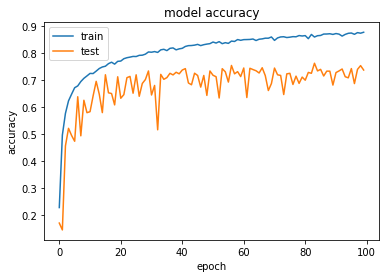

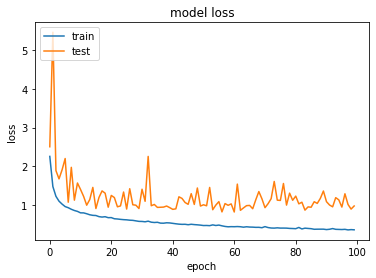

In [17]:
cls()

In [20]:
model.save("/content/drive/MyDrive/Tensorflow_datasets_ryan/GRU_emb_conv3.model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Tensorflow_datasets_ryan/GRU_emb_conv3.model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Tensorflow_datasets_ryan/GRU_emb_conv3.model/assets


In [19]:
model = keras.models.load_model("/content/drive/MyDrive/Tensorflow_datasets_ryan/GRU_emb_conv3.model")
loss, accuracy = model.evaluate(x_validation, y_validation)
print("Validation Results:\nLoss = {:0.2f}\nAccuracy = {:0.2f}".format(loss, accuracy))


204/204 [==============================] - 4s 18ms/step - loss: 0.9886 - accuracy: 0.7380
Validation Results:
Loss = 0.99
Accuracy = 0.74


In [95]:

# # list all data in history
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
# character_sequences = tokenizer.texts_to_sequences(text_test)
# sequence_matrix = keras.preprocessing.sequence.pad_sequences(character_sequences, maxlen=MAX_STRING_LENGTH)
# prediction = model.predict(sequence_matrix)
# f = open("ytest.txt", "w")
# for i in range(len(text_test)):
#     f.write(str(numpy.argmax(prediction[i])) + "\n")
# f.close()
# print("Predicted labels stored.")

KTrain Bert

In [2]:
!pip3 install ktrain

In [3]:
import ktrain
from ktrain import text

In [ ]:
ktrain.__version__

'0.26.3'

In [4]:
import pandas as pd
text_df = pd.read_fwf('/content/drive/MyDrive/Tensorflow_datasets_ryan/xtrain_obfuscated.txt',header=None,names=['Text'])
novel_df = pd.read_fwf('/content/drive/MyDrive/Tensorflow_datasets_ryan/ytrain.txt',header=None,names=['Novel'])
df= pd.concat([text_df, novel_df], axis=1)
df.head()


,Text,Novel
0,satwamuluhqgulamlrmvezuhqvkrpmletwulcitwskuhle...,7
1,twmkiwpmqvtwleuhsaiwsktwmvlelekramuhqvkruhtwsk...,3
2,vidfpmskuhvilepmuluhtwtvuhulsovienamqvuhskiwmv...,8
3,raskleenkrlruhtwulenleengztwqvuhenuhsatvuhsktw...,3
4,dfenqvuhtwamqvuhqgtwiwtvenuluhqvijletwamulenxe...,4


In [12]:
x=df.Novel.to_numpy()
x

array([ 7,  3,  8, ..., 10,  6,  3])

In [27]:
# tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
# tokenizer.fit_on_texts(df['Text'].values)
# character_sequences = tokenizer.texts_to_sequences(df['Text'].values)
# sequence_matrix = keras.preprocessing.sequence.pad_sequences(character_sequences)
sequence_matrix = df['Text'].values.tolist()
categorical_labels = df.Novel.to_numpy()

x_train, x_validation, y_train, y_validation = sklearn.model_selection.train_test_split(
    sequence_matrix, categorical_labels, test_size=0.20)

In [18]:
sequence_matrix[0]

'satwamuluhqgulamlrmvezuhqvkrpmletwulcitwskuhlemvtwamuluhiwiwenuhlrvimvqvkruhulenamuluhqgqvtwvimviwuhtwamuluhulqvkrenamcitwuhvipmpmqvuhskiwkrpmdfuhlrvimvskvikrpmqvuhskmvgzenleuhqvmvamuluhulenamuluhqvletwtwvipmpmgzleenamuhtwamuluhtwletwdfuhiwkrxeleentwxeuhpmqvuhtwiwmvamdfuhpkeztwamuluhvimvuhqvtwmkpmpmlelruhgztwtwskuhtwlrkrpmlruhpmuluhqvenuhtwyplepmxeuhenuhamypkrqvuhamulmvdfuhqvskentwamletwlrlrpmiwuhtwamul'

In [20]:
y_train

11

In [28]:
# load text data
categories = ['alice_in_wonderland','dracula','dubliners','great_expectations','hard_times','huckleberry_finn','les_miserable','moby_dick','oliver_twist','peter_pan','talw_of_two_cities','tom_sawyer']

(x_train, y_train) = (x_train, y_train)
(x_test, y_test) = (x_validation, y_validation)

# build, train, and validate model (Transformer is wrapper around transformers library)
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=435, class_names=categories)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier(multilabel=False)
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=20)
learner.fit_onecycle(2e-5, 4)
learner.validate(class_names=t.get_classes()) # class_names must be string values

In [13]:
learner.lr_find(max_epochs=10)

In [ ]:
import numpy as np
import pdb

from keras.models import Model
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

from AttentionLayer import Attention
import utils

#SINGLE_ATTENTION_VECTOR=True

xtra, ytra, xval, yval = utils.readMemmap()

main_input = Input(shape= (xtra.shape[1],), dtype='float32')
masked_input = Masking(mask_value=0)(main_input)

embedded_input = Embedding(27,27,input_length=452)(masked_input)
embedded_input = Dropout(0.2)(embedded_input)
x1 = GRU(128, return_sequences=True, activation='tanh')(embedded_input)
x1 = Dropout(0.2)(x1)
x1 = GRU(64, return_sequences=True, activation='tanh')(x1)
x1 = Attention(x1,input_dim,time_steps,SINGLE_ATTENTION_VECTOR)
x1 = Attention()(x1)

embedded_input_s = Embedding(27,27,input_length=452)(masked_input)
embedded_input_s = Dropout(0.2)(embedded_input_s)
x_s = GRU(64, return_sequences=True, activation='tanh')(embedded_input_s)
x_s = Attention()(x_s)

x = concatenate([x1,x_s])

x = Dense(256)(x)
x = Dropout(0.2)(x)
x = LeakyReLU()(x)

x = Dense(256)(x)
x = Dropout(0.2)(x)
x = LeakyReLU()(x)

x = Dense(128)(x)
x = Dropout(0.2)(x)
x = LeakyReLU()(x)

x = Dense(64)(x)
x = Dropout(0.2)(x)
x = LeakyReLU()(x)

output = Dense(12, activation='softmax')(x)
model = Model(inputs= main_input, outputs= output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

filepath="models/GRU_Attention_SmartMax_loss_{loss:.4f}-acc_{acc:.4f}-vloss_{val_loss:.4f}-vacc_{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

print(model.summary())
plot_model(model, to_file='plot/4_GRU_Atten_Mask.png', show_shapes=True, show_layer_names=False)

model.fit(xtra, ytra, epochs=100, validation_data=(xval,yval), batch_size=100, callbacks=callbacks_list)

yval_hat = model.predict(xval)
pr = calPrecisionRecall(yval, yval_hat)

In [45]:
def inputs(bob,al):
    count = 0
    for i in str(bob):
        for j in str(al):
            if i==j:
                count+=1
    return count

In [46]:
inputs(101010,101010)

18

In [54]:
a = 12345
for i in range (len(str(a))):
  str(a)[i]

1
2
3
4
5


TypeError: ignored